In [1]:
import numpy as np
import pickle
from astropy.io import fits
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
from galpy.util import bovy_conversion, bovy_coords, save_pickles, bovy_plot
from galpy.potential import MWPotential2014, turn_physical_off, vcirc
import astropy.units as u
%pylab inline
from galpy.orbit import Orbit
from scipy import ndimage, signal, interpolate

ro=8.
vo=220.


Populating the interactive namespace from numpy and matplotlib


In [3]:
index = [16,28,37,14,31,6,3,39,18,17,9,8,30,10,32,38,21,15,13,5,2,34,20]

#time_all= parse_times('128sampling',9.,ro=ro,vo=vo)

rel_vel_all=[]

M_impact_all=[]

impact_param=[]

rs=[]

timpact=[]

Nsim = 23
for jj in index:#range(42) :
           
    #load the saved pickle file for converting apars to obs coords
    #with open('../../streamgap-pepper/GMC/set_impact_pkl/Pal5_4096_on_128impact_Plummer_Mmin105_MC_rand_rotate_{}.pkl'.format(jj),'rb') as savefile:
    with open('GMC_impacted_stream/GD1_7400_on_128impact_Plummer_td9.0_Mmin105_MW2014_{}.pkl'.format(jj),'rb') as savefile:   
        sdf_pepper= pickle.load(savefile,encoding='latin1')
            
    mimpact=sdf_pepper._GM
    for ii in range(len(mimpact)):
        M_impact_all.append(mimpact[ii]*bovy_conversion.mass_in_msol(vo,ro))
        impact_param.append(sdf_pepper._impactb[ii]*8.)
        timpact.append(sdf_pepper._timpact[ii]*bovy_conversion.time_in_Gyr(vo,ro))
        rs.append(sdf_pepper._rs[ii]*8.)
    
    
    print ("The stream had %i impacts"%len(sdf_pepper._GM))
    time_impact = sdf_pepper._timpact 
    apar_impact = sdf_pepper._impact_angle
    subhalo_vel = sdf_pepper._subhalovel
           
    for kk in range(len(time_impact)):
                   
       #apar of the stream at timpact
        apar=sdf_pepper._sgapdfs_coordtransform[time_impact[kk]]._kick_interpolatedThetasTrack

       #match impact apar to the nearest apar of the stream at timpact
        imp_apar_ind = np.argmin(np.abs(apar - apar_impact[kk]*np.ones(len(apar))))
        stream_track = sdf_pepper._sgapdfs_coordtransform[time_impact[kk]]._kick_interpolatedObsTrackXY

      #velocity of the stream chunk at timpact
        vstream = stream_track[:,[3,4,5]][imp_apar_ind]
        #print (vstream , subhalo_vel[kk] )
        Delta_v=subhalo_vel[kk] - vstream
        #print (Delta_v)
        delta_v_norm = np.linalg.norm(Delta_v)*220.
        rel_vel_all.append(delta_v_norm)

    

The stream had 25 impacts
The stream had 20 impacts
The stream had 23 impacts
The stream had 21 impacts
The stream had 21 impacts
The stream had 20 impacts
The stream had 21 impacts
The stream had 21 impacts
The stream had 19 impacts
The stream had 19 impacts
The stream had 20 impacts
The stream had 18 impacts
The stream had 16 impacts
The stream had 17 impacts
The stream had 15 impacts
The stream had 14 impacts
The stream had 15 impacts
The stream had 14 impacts
The stream had 14 impacts
The stream had 12 impacts
The stream had 12 impacts
The stream had 12 impacts
The stream had 8 impacts


In [4]:
pal5_dir='../../streamgap-pepper/Baryonic_effects_on_Pal5/'

vo=220.
ro=8.

          
MM_cdm=[]




for ii in range(101):
    count=0
        
    #dat=np.genfromtxt(pal5_dir + 'Pal5_CDM/Pal5_subhalo_mass_{}.dat'.format(ii))
    dat=np.genfromtxt('CDM_impacts/GD-1_CDM_impactmass_5-9_X5_{}.dat'.format(ii))
    
    for jj in range(len(dat)) :
        if dat[jj] > 5. : #ad-hoc to get the masses
            #print (dat[jj])
            count+=1
            
        else :
            MM_cdm.append(dat[jj]*bovy_conversion.mass_in_msol(vo,ro))
            
    print (ii, count)
     
        
print (len(MM_cdm)/(101*11))

0 11
1 11
2 11
3 11
4 11
5 11
6 11
7 11
8 11
9 11
10 11
11 11
12 11
13 11
14 11
15 11
16 11
17 11
18 11
19 11
20 11
21 11
22 11
23 11
24 11
25 11
26 11
27 11
28 11
29 11
30 11
31 11
32 11
33 11
34 11
35 11
36 11
37 11
38 11
39 11
40 11
41 11
42 11
43 11
44 11
45 11
46 11
47 11
48 11
49 11
50 11
51 11
52 11
53 11
54 11
55 11
56 11
57 11
58 11
59 11
60 11
61 11
62 11
63 11
64 11
65 11
66 11
67 11
68 11
69 11
70 11
71 11
72 11
73 11
74 11
75 11
76 11
77 11
78 11
79 11
80 11
81 11
82 11
83 11
84 11
85 11
86 11
87 11
88 11
89 11
90 11
91 11
92 11
93 11
94 11
95 11
96 11
97 11
98 11
99 11
100 11
65.13771377137714


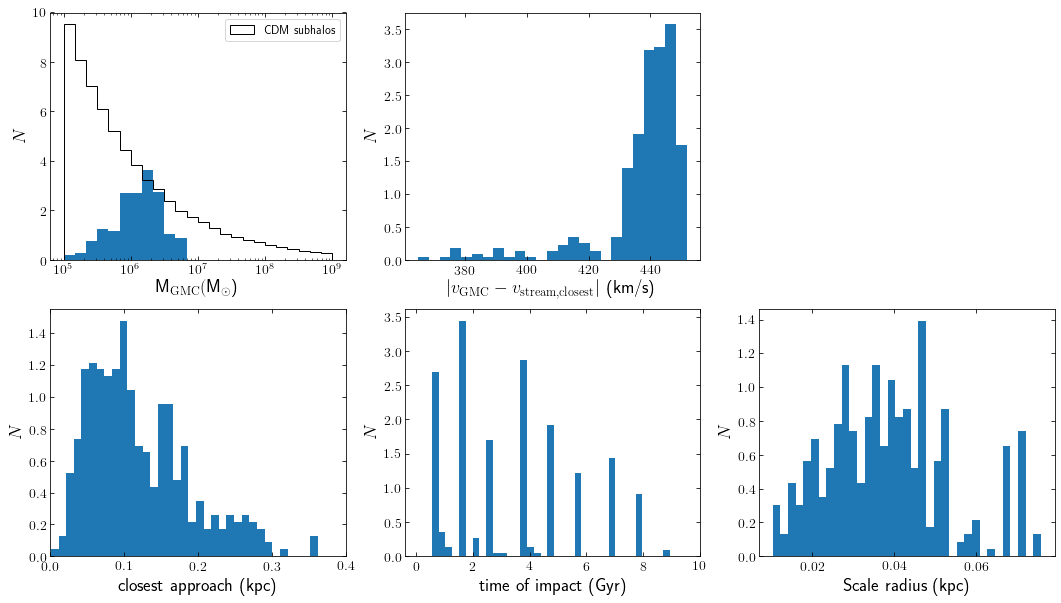

In [5]:
bovy_plot.bovy_print(axes_labelsize=18.,xtick_labelsize=14.,ytick_labelsize=14.)


Mexp=np.linspace(5.,9.,25)
Mbins=10**Mexp

figsize(18,10)
mbins=np.linspace(10**5.,10**7.,50)

subplot(2,3,1)

hist(M_impact_all,bins=Mbins,weights=np.ones(len(M_impact_all))*(1/Nsim))
hist(MM_cdm,weights=(1./(11*101))*np.ones(len(MM_cdm)),label='CDM subhalos',bins=Mbins,histtype='step',lw=1,color='k')
xscale('log')
ylabel(r'$N$')
xlabel(r'M$_{\rm{GMC}} ($M$_{\odot}$)')
legend(loc='upper right')

subplot(2,3,2)
hist(rel_vel_all,bins=25,weights=np.ones(len(rel_vel_all))*(1/Nsim))
xlabel(r'$|v_{\rm{GMC}} - v_{\rm{stream,closest}}|$ (km/s)')
ylabel(r'$N$')

subplot(2,3,4)
hist(impact_param,bins=35,weights=np.ones(len(impact_param))*(1/Nsim))
xlim(0.,0.4)
xlabel(r'closest approach (kpc)')
ylabel(r'$N$')

subplot(2,3,5)
hist(timpact,bins=35,weights=np.ones(len(timpact))*(1/Nsim))
xlim(-0.4,10.)
xlabel(r'time of impact (Gyr)')
ylabel(r'$N$')

subplot(2,3,6)
hist(rs,bins=35,weights=np.ones(len(timpact))*(1/Nsim))
xlabel(r'Scale radius (kpc)')
ylabel(r'$N$')

savefig('plots/GD-1_mass_vel_GMC_distribution.pdf')
plt.show()



In [ ]:
Mexp=np.linspace(5.,9.,25)

Mbins=10**Mexp

plt.figure()
plt.hist(MM_cdm,weights=(1./(996.))*np.ones(len(MM_cdm)),bins=Mbins,histtype='step',lw=1,color='k')
plt.xscale('log')
plt.show()